In [49]:
from utils import *

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

import os
os.chdir("../../scVI/")
os.getcwd()
save_path = '../CSF/Notebooks/'

In [2]:
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')
celllabels = np.load(save_path + 'meta/celllabels.npy')
batchid = np.load(save_path+'meta/batchid.npy')
celltype, labels = np.unique(celllabels, return_inverse=True)
isMS = np.load(save_path+'meta/isMS.npy')
isCSF = np.load(save_path+'meta/isCSF.npy')
validclusters = (celllabels!='Mono Doublet') & \
(celllabels!='contamination1') & \
(celllabels!='doublet') & \
(celllabels!='B cell doublets') & \
(celllabels!='RBC')
isCD4 = celllabels=='CD4'

In [29]:
celltype_ordered = ['plasma','B1','B2','CD4','Tregs','Tdg','CD8n','CD8a','NK1','NK2','Mono','ncMono','Gran','mDC1','mDC2','pDC']


In [30]:
grouped_counts = []
for i in celltype_ordered:
    count = np.asarray([
        np.sum((isMS*isCSF)[celllabels==i]),
        np.sum(((isMS==False)*isCSF)[celllabels==i]),
        np.sum((isMS*(isCSF==False))[celllabels==i]),
        np.sum(((isMS==False)*(isCSF==False))[celllabels==i]),
    ])
    grouped_counts.append(count)
    
grouped_counts = np.asarray(grouped_counts)

np.savetxt(save_path + 'count_test/grouped_counts.count.txt',grouped_counts)

In [31]:
celltype_counts = []
for i in celltype_ordered:
    count = np.asarray([np.sum((celllabels==i)*(batchid==j))
        for j in np.unique(batchid)
    ])
    celltype_counts.append(count)
    
celltype_counts = np.asarray(celltype_counts)
np.savetxt(save_path + 'count_test/celltype_counts.count.txt',celltype_counts)

In [32]:
total = np.sum(celltype_counts,0)

In [33]:
xrange = (np.min(latent_u[celllabels!='MegaK',0]),np.max(latent_u[celllabels!='MegaK',0]))
yrange = (np.min(latent_u[celllabels!='MegaK',1]),np.max(latent_u[celllabels!='MegaK',1]))


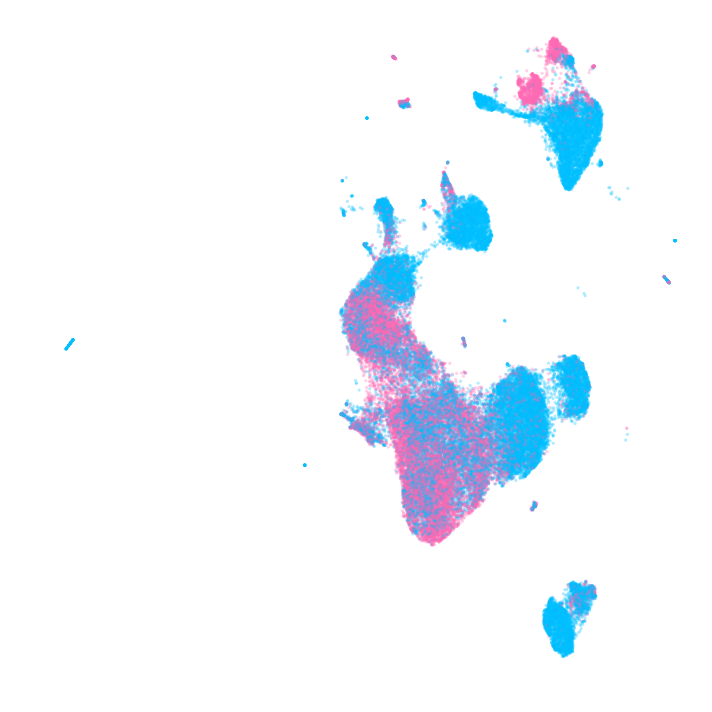

In [34]:
from matplotlib.colors import LinearSegmentedColormap
from numpy import random
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue','hotpink'], N=2)

fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(latent_u[clusters!=11, 0], latent_u[clusters!=11, 1],color = 'lightgray',edgecolors='none',alpha=1)
idx = validclusters
order = np.arange(sum(idx))
random.shuffle(order)
ax.scatter(latent_u[idx, 0][order], latent_u[idx, 1][order],c=isCSF[idx][order],cmap=cm,edgecolors='none',alpha=0.3,s=10)    
plt.axis("off")
plt.tight_layout()
# plt.show()
plt.savefig(save_path + 'figures/SupFigure3/allclusters.isCSF.png',dpi=300)
# plt.savefig('../CSF/figures/allclusters.legend.pdf')

In [36]:
tissue=np.concatenate([np.repeat('CSF',8),np.repeat('PBMC',10)])
states=np.asarray(['MS','MS','MS','MS','control','control','control','control',
                   'MS','MS','MS','MS','MS','control','control','control','control','control'])

samplenames = [x+'_'+states[i] for i,x in enumerate(tissue)]
samplenames = np.asarray(samplenames)

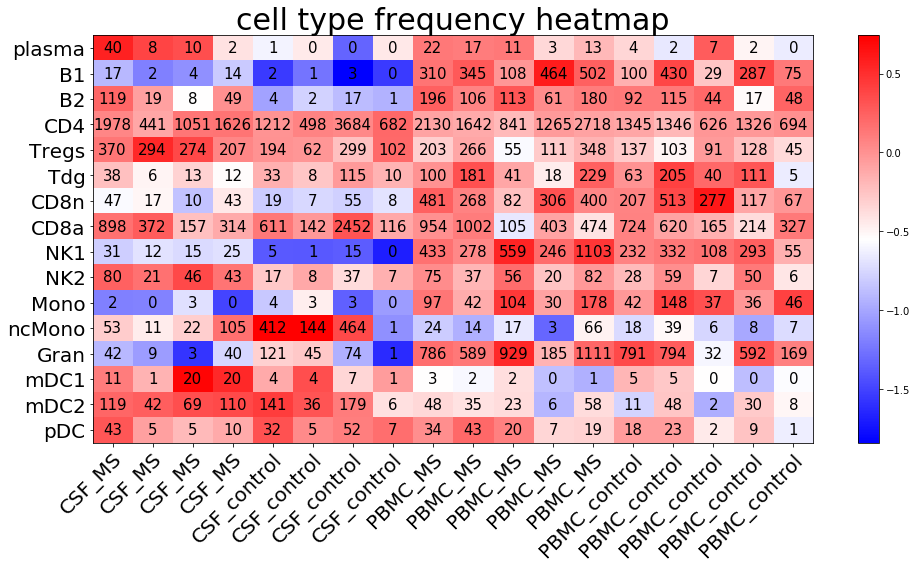

In [37]:
Heatmap(celltype_counts.T, total,
        samplenames,celltype_ordered,
        'cell type frequency heatmap','SupFigure3/freq.heatmap.pdf',width=14)


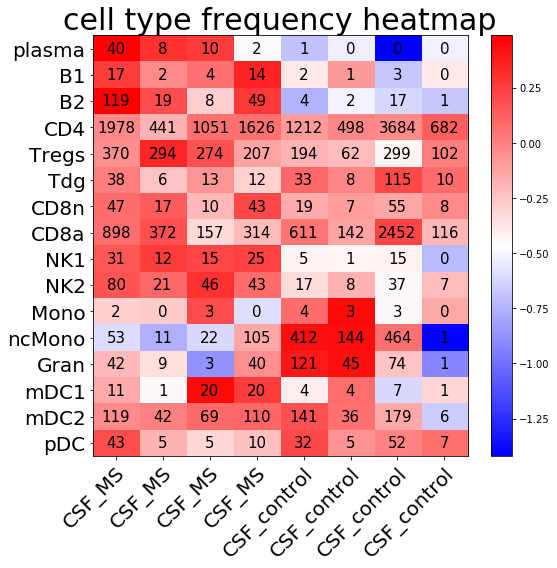

In [39]:
Heatmap(celltype_counts.T[tissue=='CSF',:], total[tissue=='CSF'],
        samplenames[tissue=='CSF'],celltype_ordered,
        'cell type frequency heatmap','SupFigure3/CSF.freq.heatmap.pdf',width=8)


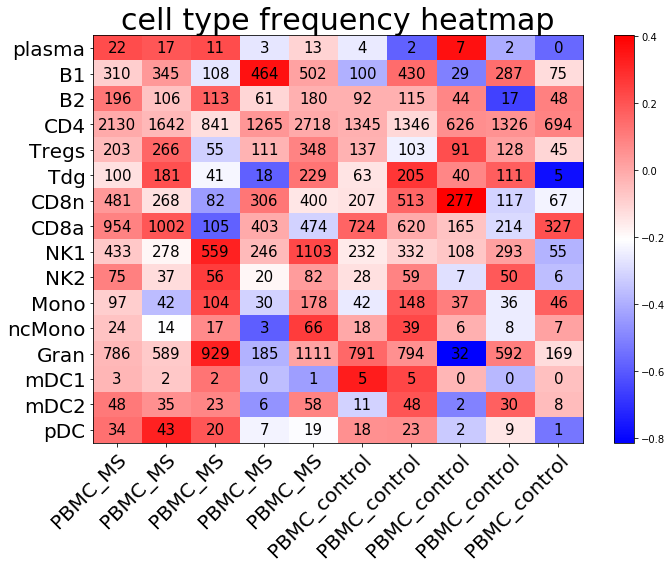

In [40]:
Heatmap(celltype_counts.T[tissue=='PBMC',:], total[tissue=='PBMC'],
        samplenames[tissue=='PBMC'], celltype_ordered,
        'cell type frequency heatmap','SupFigure3/PBMC.freq.heatmap.pdf',width=10)


In [42]:
grouped_count= np.asarray([np.sum(celltype_counts.T[samplenames==name,:],axis=0) for name in np.unique(samplenames)])

In [43]:
grouped_total= np.asarray([np.sum(total[samplenames==name]) for name in np.unique(samplenames)])

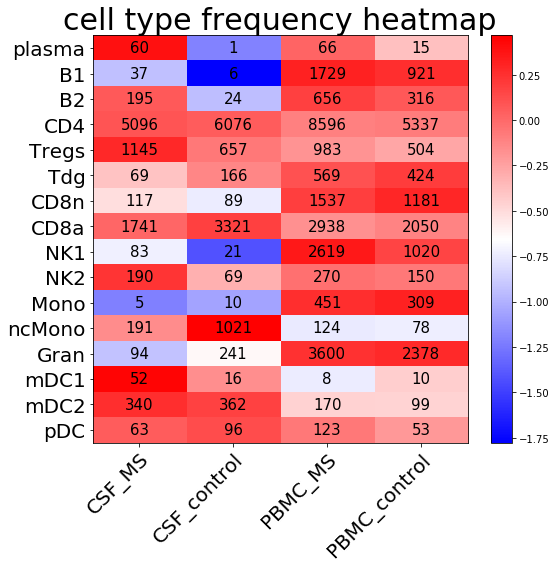

In [44]:
Heatmap(grouped_count, grouped_total,
        np.unique(samplenames),celltype_ordered,
        'cell type frequency heatmap','SupFigure3/grouped.freq.heatmap.pdf',width=8)

In [46]:
import pickle
with open(save_path + 'dataset/all_datasets.pkl', 'rb') as f:
    gene_dataset = pickle.load(f)

scaling_factor = gene_dataset.X.mean(axis=1)
norm_X = gene_dataset.X/scaling_factor.reshape(len(scaling_factor), 1)

In [ ]:
labels = np.load(save_path + 'meta/CD4.clusters.npy')
celltypes = np.unique(labels).astype(str)

celllabels = np.load(save_path + 'meta/celllabels.npy')
isCD4 = celllabels=='CD4'
CD4labels = np.repeat(-1,len(celllabels))
CD4labels[isCD4] = labels

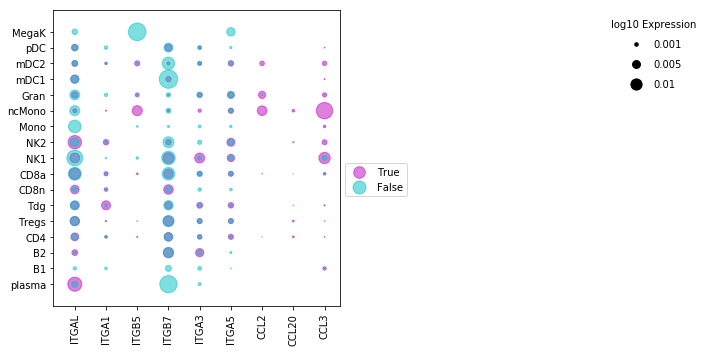

In [50]:
scale=.5
CSFlist = ['ITGAL', 'ITGA1', 'ITGB5', 'ITGB7', 'ITGA3', 'ITGA5', 'CCL2', 'CCL20', 'CCL3']
temp = DotPlotCompare(norm_X, gene_dataset.gene_names, 
            CSFlist, celllabels, isCSF,validclusters*(isMS==False),
            labelnames=['plasma','B1','B2','CD4','Tregs','Tdg','CD8n','CD8a','NK1','NK2','Mono','ncMono','Gran','mDC1','mDC2','pDC','MegaK'],
            dotsize=500*scale**2,filename=save_path+'figures/SupFigure3/CSFtrafficking.pdf',
            height=10*scale,width=10*scale)